In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#data = pd.read_excel("E:\Kuliah\S2\Thesis\Scraping data properti\data_properti_11-07-2022.xlsx")
from google.colab import files 
uploaded = files.upload()
#Code ini digunakan ketika file excel/csv yang digunakan berasal dari server atau laptop user

Saving tes.xlsx to tes.xlsx


In [ ]:
data = pd.read_excel('tes.xlsx')
data.head()

,id,nama,price,deskripsi,alamat,category,sub_category,bedrooms,bathrooms,build_size,land_size,data_furnished,geo_loc
0,HO6307333512669ID,Jual Rumah Murah dalam Perumahan full furnishe...,469000000,"Lokasi Strategis di Perumahan Potorono, Cepoko...",Banguntapan Bantul,house,"[""house"",""single-family-house""]",3,2,75.0,112.0,NaN,NaN
1,HO63099F760949CID,RUMAH MODERN MINIMALIST 100 JUTA AN DI JOGJA\n...,185000000,PERUMAHAN HAPPY HOMES HILLS Fasilitas : - One...,Yogyakarta Yogyakarta,house,"[""house"",""subsidized-house""]",2,1,36.0,73.0,NaN,"[110.3682591,-7.8022815]"
2,HO62ECBE115F461ID,Rumah Villa Di Maguwoharjo\n ...,270000000,FASILITAS: One Gate System Akses Bisa 2 Mobil ...,Maguwoharjo Sleman,house,"[""house"",""villa""]",2,2,78.0,94.0,NaN,NaN
3,HO62DB7C32E5F7EID,PERUMAHAN 100 JUTAAN DI BANTUL\n ...,155000000,PERUMAHAN HAPPY HOMES HILLS Promo Rumah Americ...,Yogyakarta Yogyakarta,house,"[""house"",""subsidized-house""]",2,1,30.0,60.0,NaN,"[110.3682591,-7.8022815]"
4,HO62F4F5E20BD2EID,"TERLARIS,PROMO MERDEKA RUMAH MURAH SLEMAN DESA...",369000000,PROMO MERDEKA 77 FREE BPHTB FREE AJB FREE Nota...,Depok Sleman,house,"[""house"",""single-family-house""]",2,1,36.0,90.0,NaN,"[110.386374,-7.772645]"


In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

## New Section
Menurut Hanley & Splash (1993), ada 3 faktor yg mempengaruhi nilai properti :


*   Karakteristik fisik (luas tanah,luas bangunan,jumlah kamar mandi
& kamar tidur)
*   Karakteristik aksesibilitas (akses menuju pusat kota)
*   Karakteristik lingkungan

Sehingga perl ditambahkan kategori untuk hal diatas







In [ ]:
data.describe()

,price,bedrooms,bathrooms,build_size,land_size,data_furnished
count,1.197900e+04,11979.000000,11979.000000,11979.000000,11979.000000,337.000000
mean,1.523641e+09,3.518741,2.429752,125.336183,181.073270,113.350148
std,2.601915e+09,4.146452,3.030948,132.029161,307.695222,31.674060
min,1.000000e+08,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.730000e+08,2.000000,1.000000,47.000000,90.000000,123.000000
50%,7.990000e+08,3.000000,2.000000,80.000000,113.000000,123.000000
75%,1.650000e+09,4.000000,3.000000,150.000000,156.000000,123.000000
max,8.600000e+10,300.000000,142.000000,2200.000000,11670.000000,124.000000


### EDA (Explore Data Analysis)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
#sebelum dibagi 1.000.000
sns.boxplot(data.price)

In [ ]:
#data dibagi 1.000.000 untuk memudahkan penghitungan dan membaca nominal
data.price=data.price/1000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


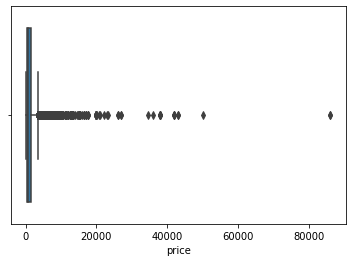

In [ ]:
#setelah dibagi 1.000.000
sns.boxplot(data.price)

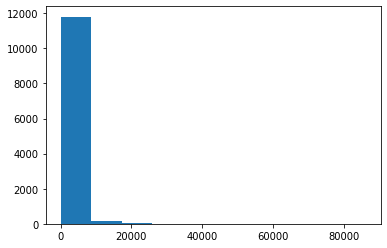

In [ ]:
plt.hist(data.price)
plt.show()

### Cek distribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


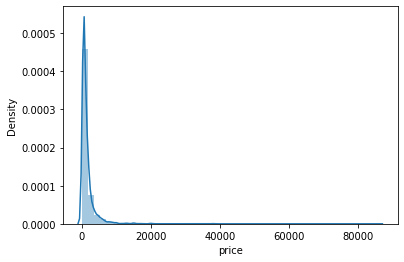

In [ ]:
sns.distplot(data.price)

### REMOVE OUTLIER

In [ ]:
data.duplicated().sum()

3233

In [ ]:

data.drop_duplicates(inplace = True)

In [ ]:
data.info()

In [ ]:
#cek dari deskripsi datanya
data.describe()

Menghapus outlier pada feature bedrooms

In [ ]:
#Outlier pada variabel Bedrooms
bedrooms_outlier = data[data.bedrooms > 4]
bedrooms_outlier.head()

In [ ]:
data = data[~data.bedrooms.isin(bedrooms_outlier.bedrooms)]

In [ ]:
#Hapus outlier < 1
bedrooms_outlier1 = data[data.bedrooms < 1]
#bedrooms_outlier1.head()

In [ ]:
data = data[~data.bedrooms.isin(bedrooms_outlier1.bedrooms)]

In [ ]:
sns.countplot(data.bedrooms)

In [ ]:
sns.boxplot(data.bedrooms)

In [ ]:
data.describe()

Menghapus outlier pada feature Bathrooms

In [ ]:
#Outlier pada variabel bathrooms
bathrooms_outlier = data[data.bathrooms > 3]
bathrooms_outlier.head()

In [ ]:
data = data[~data.bathrooms.isin(bathrooms_outlier.bathrooms)]

In [ ]:
out_bathroom = data[data.bathrooms < 1]
out_bathroom.head()

In [ ]:
data = data[~data.bathrooms.isin(out_bathroom.bathrooms)]

In [ ]:
sns.countplot(data.bathrooms)

In [ ]:
sns.boxplot(data.bathrooms)

In [ ]:
#data.info()

In [ ]:
#Jika diperlukan untuk menghapus outlier pada land_size
'''land_outlier = data[data.land_size > 180]
land_outlier.head()'''

In [ ]:
#data = data[~data.land_size.isin(land_outlier.land_size)]

In [ ]:
#out_land = data[data.land_size < 50]
#out_land.head()

In [ ]:
#data = data[~data.land_size.isin(out_land.land_size)] 

In [ ]:
#sns.boxplot(data.land_size)

In [ ]:
#plt.figure(figsize=(6,3))
#sns.scatterplot(data.land_size,data.price)

Menghapus outlier pada feature build_size

In [ ]:
out_build = data[data.build_size < 21]
#out_build.head()

In [ ]:
data = data[~data.build_size.isin(out_build.build_size)] 

In [ ]:
sns.boxplot(data.build_size)

In [ ]:
plt.figure(figsize=(6,3))
sns.scatterplot(data.build_size,data.price)

In [ ]:
data.describe()

,price,bedrooms,bathrooms,build_size,land_size,data_furnished
count,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,235.000000
mean,939.523278,2.673145,1.677856,85.307580,129.699308,115.417021
std,1002.970070,0.692682,0.721501,62.570189,123.437839,28.284357
min,100.000000,1.000000,1.000000,0.000000,50.000000,11.000000
25%,425.000000,2.000000,1.000000,45.000000,89.000000,123.000000
50%,655.000000,3.000000,2.000000,70.000000,105.000000,123.000000
75%,1139.457000,3.000000,2.000000,100.000000,130.000000,123.000000
max,26000.000000,4.000000,3.000000,1343.000000,3000.000000,124.000000


####skip

In [ ]:
#data.build_size.value_counts()

In [ ]:
#data.build_size = data.build_size.astype('str')

In [ ]:
#data.head()

In [ ]:
#size = data.build_size.value_counts()
#size.head(25)

In [ ]:
'''data['tipe_21'] = data.build_size.apply(lambda x:1 if '21' in x else 0)
data['tipe_24'] = data.build_size.apply(lambda x:1 if '24' in x else 0)
data['tipe_36'] = data.build_size.apply(lambda x:1 if '36' in x else 0)
data['tipe_45'] = data.build_size.apply(lambda x:1 if '45' in x else 0)
data['tipe_54'] = data.build_size.apply(lambda x:1 if '54' in x else 0)
data['tipe_60'] = data.build_size.apply(lambda x:1 if '60' in x else 0)
data['tipe_70'] = data.build_size.apply(lambda x:1 if '70' in x else 0)
data['tipe_90'] = data.build_size.apply(lambda x:1 if '90' in x else 0)
data.sample(5)'''

In [ ]:
'''data.build_size = data.build_size.astype('float')
data.head()'''

####Lanjut

###Data Manupulation (Preprocessing)

#### Menurut Mappi
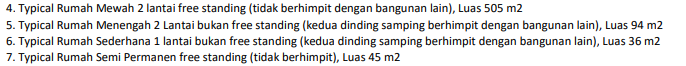

Pembuatan variabel baru untuk spesifikasi umum bangunan di ambil dari tabel feature category

In [ ]:
# Spesifikasi umum bangunan
data.category= pd.cut(data.build_size,
                      bins = [0,36,94,505,2200],
                      labels=['Rumah Sangat Sederhana',
                              'Rumah Sederhana',
                              'Rumah Menengah',
                              'Rumah Mewah'])


Pembuatan variabel baru untuk type rumah di ambil dari tabel feature data_furnished

In [ ]:
#Type rumah
#data.data_furnished = pd.cut(data.build_size, bins=[0,25,36,45,54,60,70,120,11670],
#                             labels=['tipe 21','tipe 36','tipe 45','tipe 54',
#                                     'tipe 60','tipe 70','tipe 120','tipe > 120'])
data.data_furnished = pd.cut(data.build_size, bins=[0,25,36,45,54,60,70,120,3000],
                             labels=['tipe 21','tipe 36','tipe 45','tipe 54',
                                     'tipe 60','tipe 70','tipe 120','tipe > 120'])


Pembuatan variabel baru untuk jenis rumah di ambil dari tabel feature sub_category

In [ ]:
'''Jenis rumah
Menurut SKB Menteri Dalam Negeri, Menteri PU, Menteri Perumahan Rakyat tahun 1992'''
data.sub_category = pd.cut(data.build_size,
                           bins=[0,200,650,3000],
                           labels=['Sederhana',
                                   'Menengah',
                                   'Mewah'])


In [ ]:
data.describe()

,price,bedrooms,bathrooms,build_size,land_size
count,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000
mean,939.523278,2.673145,1.677856,85.307580,129.699308
std,1002.970070,0.692682,0.721501,62.570189,123.437839
min,100.000000,1.000000,1.000000,0.000000,50.000000
25%,425.000000,2.000000,1.000000,45.000000,89.000000
50%,655.000000,3.000000,2.000000,70.000000,105.000000
75%,1139.457000,3.000000,2.000000,100.000000,130.000000
max,26000.000000,4.000000,3.000000,1343.000000,3000.000000


Pembuatan variabel baru untuk jarak ke pusat kota di ambil dari tabel feature deskripsi

In [ ]:
'''
Menurut Siregar (2016), selain karakteristik fisik, jarak ke pusat kota juga
mempengaruhi harga
'''
# Jarak ke pusat kota
#data.deskripsi = pd.cut(data.price,
#                        bins=[0,200,400,600,900,2000,5000,10000,86000],
#                        labels=['sangat jauh',
#                                'lumayan jauh',
#                                'jauh',
#                                'sedang',
#                                'agak dekat <= 5km',
#                                'lumayan dekat <= 3km',
#                                'sangat dekat <= 2km',
#                                'pusat kota'])

data.deskripsi = pd.cut(data.price,
                        bins=[0,200,400,600,900,1000,2000,8000,10000],
                        labels=['sangat jauh',
                                'lumayan jauh',
                                'jauh',
                                'sedang',
                                'agak dekat <= 5km',
                                'lumayan dekat <= 3km',
                                'sangat dekat <= 2km',
                                'pusat kota'])
data.head()

Rename tabel feature yang sudah diberikan kategori

In [ ]:
data.rename({'category':'spek_rumah','data_furnished':'type_rumah',
                         'sub_category':'jenis_rumah','geo_loc':'type_bedrooms',
                         'deskripsi':'pusat_kota'},axis =1, inplace=True)

In [ ]:
data.drop(['id','nama','type_bedrooms'],axis=1,inplace=True)


In [ ]:


'''
pembobotan untuk lebih mendetail lebih berat karena akan butuh waktu observasi
lebih lama pada timeline penelitian. 
untuk indeks gini saja butuh 6 tahun. 
'''

###Cek data null & duplicate

In [ ]:
data.duplicated().sum()

1917

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
#cek apakah ada data yang null
data.isna().sum()

price             0
pusat_kota     4807
alamat            0
spek_rumah        0
jenis_rumah       3
bedrooms          0
bathrooms         0
build_size        0
land_size         0
type_rumah        3
dtype: int64

In [ ]:
data.dropna()

###Data Cleaning

In [ ]:
data.head()

In [ ]:
data.describe()

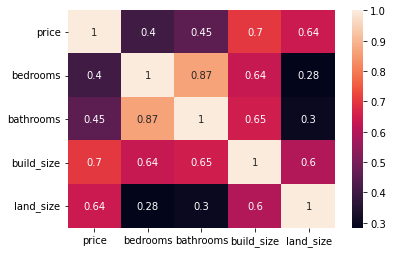

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          6750 non-null   float64
 1   pusat_kota     6750 non-null   object 
 2   alamat         6750 non-null   object 
 3   jenis_rumah    6750 non-null   object 
 4   spek_rumah     6750 non-null   object 
 5   bedrooms       6750 non-null   int64  
 6   bathrooms      6750 non-null   int64  
 7   build_size     6750 non-null   float64
 8   land_size      6750 non-null   float64
 9   type_rumah     6750 non-null   object 
 10  type_bedrooms  6750 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 580.2+ KB


In [ ]:
sns.displot(np.log(data.price))

In [ ]:
data.head()

In [ ]:
data.alamat.value_counts()

### Convert variabel alamat

In [ ]:
#data['location_bin'] = data.alamat.apply(lambda x: x if x in alamat else 'other')
data['alamat'] = data.alamat.apply(lambda x: x)
location_bin = data.alamat.value_counts()

In [ ]:
location_bin

In [ ]:
location_bin_10 = location_bin[location_bin<=10]
location_bin_10

In [ ]:
data.alamat = data.alamat.apply(lambda x:'Other' if x in location_bin_10 else x)

In [ ]:
data.alamat.value_counts()

In [ ]:
#sns.countplot(data.location_bin)

In [ ]:
#sns.boxplot(y='price', x='location_bin', data=data)

In [ ]:
#data.drop(['alamat'], axis=1, inplace=True)

In [ ]:
'''dummies = pd.get_dummies(data.location_bin)
data = pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')
data.drop('location_bin',axis='columns',inplace=True)
data.head(25)'''

In [ ]:
#data.to_csv('data_cleaned_3.csv')

In [ ]:

#data.head()

In [ ]:
#data.drop(['category','sub_category'],axis=1,inplace=True)

In [ ]:
data = data[data['alamat'] != 'Cangkringan Sleman']
data = data[data['alamat'] != 'Tegalrejo']
data = data[data['alamat'] != 'Ngawen Gunung Kidul']
data = data[data['alamat'] != 'Karangmojo Gunung Kidul']
data = data[data['alamat'] != 'Lendah Kulon Progo']
data = data[data['alamat'] != 'Tanjungsari Gunung Kidul']
data = data[data['alamat'] != 'Tepus Gunung Kidul']

### Model selection

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, mean_absolute_error
from sklearn.compose import ColumnTransformer,make_column_transformer

### Data Splitting

In [ ]:
X = data.drop(columns='price')
y = np.log(data.price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4313, 9), (1849, 9), (4313,), (1849,))

In [ ]:
X_train.head(1)

,pusat_kota,alamat,spek_rumah,jenis_rumah,bedrooms,bathrooms,build_size,land_size,type_rumah
4414,agak dekat <= 5km,Ngemplak Sleman,Rumah Menengah,Sederhana,3,2,136.0,118.0,tipe > 120


In [ ]:
col_trans = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,2,3,8])],remainder='passthrough')
#col_trans = ColumnTransformer(transformers=[(OneHotEncoder(drop='first'),
#                                     ['alamat','pusat_kota','jenis_rumah',
#                                      'spek_rumah','type_rumah','type_bedrooms'])],
#                                    remainder='passthrough')'''



In [ ]:
data.head()

In [ ]:
sc = StandardScaler() 

### Permodel Algoritma

In [ ]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC

In [ ]:
lr = LinearRegression(normalize=True)
pipe = make_pipeline(col_trans,sc,lr)
pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)
print('R2 Score = ',r2_score(y_test,y_predict))
print('MAPE Score = ',mean_absolute_percentage_error(y_test,y_predict))
print('MSE Score = ',mean_squared_error(y_test,y_predict))
print('RMSE Score = ',mean_squared_error(y_test,y_predict, squared=False))

R2 Score =  0.9644390302164229
MAPE Score =  0.019603386888957533
MSE Score =  0.02905572726798467
RMSE Score =  0.1704574060226914


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
sns.distplot((y_test-y_predict))

In [ ]:
lasso = Lasso()
pipe1 = make_pipeline(sc,lasso)
pipe1.fit(X_train,y_train)
y_predict = pipe1.predict(X_test)
print('R2 Score = ',r2_score(y_test,y_predict))
print('MAPE Score = ',mean_absolute_percentage_error(y_test,y_predict))

R2 Score =  0.5006178175399726
MAPE Score =  0.34706916551018413


In [ ]:
rr = Ridge()
pipe2 = make_pipeline(col_trans,sc,rr)
pipe2.fit(X_train,y_train)
y_predict = pipe2.predict(X_test)
print('R2 Score = ',r2_score(y_test,y_predict))

print('MAPE Score = ',mean_absolute_percentage_error(y_test,y_predict))

R2 Score =  0.9617328612252652
MAPE Score =  0.01963994664903667


### Model Algoritma Random Forest

In [ ]:
rfr = RandomForestRegressor(n_estimators=100)
pipe3 = make_pipeline(col_trans,sc,rfr)
pipe3.fit(X_train,y_train)
y_predict = pipe3.predict(X_test)
y_trainpred = pipe3.predict(X_train)
print('R2 Score = ',r2_score(y_test,y_predict))
print('MAE 1 = ',mean_absolute_error(y_test,y_predict))
print('MAE 2 = ',mean_absolute_error(y_train,y_trainpred))
print('MSE Score = ',mean_squared_error(y_test,y_predict))
print('RMSE Score = ',mean_squared_error(y_test,y_predict, squared=False))

R2 Score =  0.9707691522616231
MAE 1 =  0.11257906459405327
MAE 2 =  0.046935092828835866
MSE Score =  0.023259818206212774
RMSE Score =  0.15251169858805183


In [ ]:
hasil1=pd.DataFrame(y_predict)
hasil1.head()

### Model Algoritma SVR

In [ ]:
svr = SVR(kernel='linear')
pipe5 = make_pipeline(col_trans,sc,svr)
pipe5.fit(X_train,y_train)
y_predict = pipe5.predict(X_test)
print('R2 Score = ',r2_score(y_test,y_predict))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_predict))

R2 Score =  0.9647871484002242
MAPE =  0.01924242960477672


In [ ]:
hasil2=pd.DataFrame(y_predict)
hasil2.head()

### Model Algoritma KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 16)
pipe6 = make_pipeline(col_trans,sc,knn)
pipe6.fit(X_train,y_train)
y_predict = pipe6.predict(X_test)
print('R2 Score = ',r2_score(y_test,y_predict))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_predict))

R2 Score =  0.8554073010183232
MAPE =  0.030602244314282722


###trying


In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(RandomForestRegressor(n_estimators= 100), X, y, cv=cv)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python

array([nan, nan, nan, nan, nan])

In [ ]:
def predict_price(location_bin,build_size,land_size,bathrooms,badrooms):    
    loc_index = np.where(X.columns==location_bin)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = build_size
    x[1] = land_size
    x[2] = bathrooms
    x[3] = badrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return rfr.predict([x])[0]

In [ ]:
data.head(25)

In [ ]:
result = predict_price('Sewon Bantul',62,75,2,2)
print(result)

In [ ]:
#Adjustment 15%

adjust_1 = result-result*0.20
print(adjust_1)

1631.2666666666669


In [ ]:
#adjusment kenaikan harga bahan bangunan = 22.14%

adjust_khbb = adjust_1-adjust_1*0.2214
print(adjust_khbb)

1270.1042266666668


In [ ]:
#adjustment perizinan/birokrasi = 14.40%

adjust_perizinan = adjust_khbb-adjust_khbb*0.1440
print(adjust_perizinan)

1087.2092180266668


In [ ]:
#adjusment uang muka KPR = 12.33%

adjust_kpr = adjust_perizinan-adjust_perizinan*0.1233
print(adjust_kpr)

953.1563214439788


In [ ]:
#adjustment pajak = 8.62%

adjust_pajak = adjust_kpr-adjust_kpr*0.0862
print(adjust_pajak)

870.9942465355077


In [ ]:
#adjust proporsi uang muka KPR

adjust_um = adjust_pajak-adjust_pajak*0.1170
print(adjust_um)

769.0879196908534


In [ ]:
#adjusment inflasi (bisa inflasi bulanan/kuartalan/tahunan) e.g = 4.94% (inflasi tahunan)
adjust_inflasi = adjust_um-adjust_um*0.0494
print(adjust_inflasi)

731.0949764581252


In [ ]:
#dikali 1.000.000
output = adjust_inflasi*1000000
print(output)

###Import pickle

In [ ]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe3,open('pipe3.pkl','wb'))